In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
file_path = 'Titanic.csv'
df = pd.read_csv(file_path)

# 1. Introduce Missing Values
df.loc[df.sample(frac=0.1).index, 'Age'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Embarked'] = np.nan

# 2. Introduce Duplicates
duplicates = df.sample(frac=0.05)
df = pd.concat([df, duplicates], ignore_index=True)

# 3. Introduce Outliers
num_outliers = 10
outliers = pd.DataFrame({
    'PassengerId': np.arange(df['PassengerId'].max() + 1, df['PassengerId'].max() + 1 + num_outliers),
    'Pclass': np.random.choice([1, 2, 3], num_outliers),
    'Name': ['Outlier'] * num_outliers,
    'Sex': np.random.choice(['male', 'female'], num_outliers),
    'Age': np.random.uniform(0, 100, num_outliers),
    'SibSp': np.random.randint(0, 5, num_outliers),
    'Parch': np.random.randint(0, 5, num_outliers),
    'Ticket': ['XXX'] * num_outliers,
    'Fare': np.random.uniform(500, 1000, num_outliers),
    'Cabin': ['Z'] * num_outliers,
    'Embarked': np.random.choice(['C', 'Q', 'S'], num_outliers),
    'Survived': np.random.choice([0, 1], num_outliers)
})
df = pd.concat([df, outliers], ignore_index=True)

# 4. Introduce Inconsistent Data
df.loc[df.sample(frac=0.05).index, 'Name'] = df['Name'].str.upper()
df.loc[df.sample(frac=0.05).index, 'Name'] = df['Name'].apply(lambda x: '   ' + x + '   ')
df.loc[df.sample(frac=0.05).index, 'Embarked'] = df['Embarked'].apply(lambda x: 'X' if x in ['C', 'Q', 'S'] else x)

# Save the modified dataset
modified_file_path = 'Titanic_modified.csv'
df.to_csv(modified_file_path, index=False)

print(f"Modified dataset saved to {modified_file_path}")

Modified dataset saved to Titanic_modified.csv


In [4]:
import pandas as pd

# Replace 'YourUsername' with your actual system username
file_path = 'Titanic_modified.csv'

# Load the Titanic dataset
df = pd.read_csv(file_path)

In [5]:
# View the first few rows of the dataset
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
0,1,3,Allison Hill,male,17.0,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,NaN,1,NaN
1,2,1,Noah Rhodes,male,60.0,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0,NaN
2,3,3,Angie Henderson,male,64.0,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1,NaN
3,4,3,DANIEL WAGNER,male,35.0,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1,NaN
4,5,1,Cristian Santos,female,70.0,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1,NaN


In [6]:
# View the last few rows of the dataset
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
1055,1006,2,OUTLIER,female,87.571586,3,0,XXX,876.352064,Q,1,Z
1056,1007,3,Outlier,male,56.288427,3,4,XXX,514.438300,S,0,Z
1057,1008,2,OUTLIER,female,24.053179,4,2,XXX,851.639306,C,1,Z
1058,1009,3,OUTLIER,female,27.117475,1,1,XXX,759.447843,S,0,Z
1059,1010,2,Outlier,male,67.143687,1,4,XXX,751.706673,C,1,Z


In [7]:
#Shows the dimensions of the Dataset (number of rows and columns).
df.shape

(1060, 12)

In [8]:
# Lists the column names in the Dataset.
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Cabin'],
      dtype='object')

In [12]:
#Provides a concise summary of the Dataset, including the number of non-null entries, column data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1060 non-null   int64  
 1   Pclass       1060 non-null   int64  
 2   Name         1060 non-null   object 
 3   Sex          1060 non-null   object 
 4   Age          957 non-null    float64
 5   SibSp        1060 non-null   int64  
 6   Parch        1060 non-null   int64  
 7   Fare         1060 non-null   float64
 8   Embarked     955 non-null    object 
 9   Survived     1060 non-null   int64  
 10  Cabin        10 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 91.2+ KB


In [41]:
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived', 'Cabin'],
      dtype='object')


In [42]:
# Dropping multiple columns (for example, 'Cabin' and 'Ticket')
df = df.drop(['Ticket'], axis=1)

KeyError: "['Ticket'] not found in axis"

In [13]:
import pandas as pd

# Load the original DataFrame
df = pd.read_csv('Titanic_modified.csv')

# Check if 'Ticket' column exists in the loaded data
if 'Ticket' in df.columns:
    # If it exists, assign it to your current DataFrame
    # Replace with the path to your current DataFrame if different
    df_current = pd.read_csv('Titanic_modified.csv')  
    df_current['Ticket'] = df['Ticket']
    print("Ticket column has been restored.")
else:
    print("Ticket column not found in the saved data.")

Ticket column has been restored.


In [14]:
#Gives a statistical summary of the numerical columns in the DataFrame, including count, mean, standard deviation, min, and max values.
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1060.000000,1060.000000,957.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,503.664151,1.960377,38.394312,2.041509,2.001887,253.950482,0.498113
std,291.601495,0.822452,22.811025,1.421597,1.415547,148.869733,0.500232
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,251.750000,1.000000,20.000000,1.000000,1.000000,130.935000,0.000000
50%,504.500000,2.000000,36.000000,2.000000,2.000000,249.505000,0.000000
75%,757.250000,3.000000,58.000000,3.000000,3.000000,367.337500,1.000000
max,1010.000000,3.000000,87.571586,4.000000,4.000000,988.672870,1.000000


In [15]:
# Summary statistics for categorical columns
df.describe(include=['O'])  # 'O' includes object types like strings

,Name,Sex,Ticket,Embarked,Cabin
count,1060,1060,1060,955,10
unique,1015,2,1001,4,1
top,Outlier,male,XXX,Q,Z
freq,5,564,10,337,10


In [16]:
# include='all' to get stats for both numerical and categorical columns
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin
count,1060.000000,1060.000000,1060,1060,957.000000,1060.000000,1060.000000,1060,1060.000000,955,1060.000000,10
unique,NaN,NaN,1015,2,NaN,NaN,NaN,1001,NaN,4,NaN,1
top,NaN,NaN,Outlier,male,NaN,NaN,NaN,XXX,NaN,Q,NaN,Z
freq,NaN,NaN,5,564,NaN,NaN,NaN,10,NaN,337,NaN,10
mean,503.664151,1.960377,NaN,NaN,38.394312,2.041509,2.001887,NaN,253.950482,NaN,0.498113,NaN
std,291.601495,0.822452,NaN,NaN,22.811025,1.421597,1.415547,NaN,148.869733,NaN,0.500232,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000,NaN
25%,251.750000,1.000000,NaN,NaN,20.000000,1.000000,1.000000,NaN,130.935000,NaN,0.000000,NaN
50%,504.500000,2.000000,NaN,NaN,36.000000,2.000000,2.000000,NaN,249.505000,NaN,0.000000,NaN
75%,757.250000,3.000000,NaN,NaN,58.000000,3.000000,3.000000,NaN,367.337500,NaN,1.000000,NaN


In [17]:
# Value counts for categorical column
df['Sex'].value_counts()

Sex
male      564
female    496
Name: count, dtype: int64

In [18]:
# Value counts for numerical column
df['PassengerId'].value_counts()

PassengerId
491    2
855    2
546    2
247    2
297    2
      ..
353    1
354    1
355    1
356    1
340    1
Name: count, Length: 1010, dtype: int64

In [19]:
# List of categorical columns - 
categorical_columns = ['Sex', 'Embarked', 'Cabin','Pclass', 'SibSp', 'Parch']

# Looping through each column to display the value counts
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Sex:
Sex
male      564
female    496
Name: count, dtype: int64


Value counts for Embarked:
Embarked
Q    337
C    295
S    276
X     47
Name: count, dtype: int64


Value counts for Cabin:
Cabin
Z    10
Name: count, dtype: int64


Value counts for Pclass:
Pclass
1    380
2    342
3    338
Name: count, dtype: int64


Value counts for SibSp:
SibSp
3    234
0    217
4    214
2    211
1    184
Name: count, dtype: int64


Value counts for Parch:
Parch
2    228
4    217
0    213
1    204
3    198
Name: count, dtype: int64




In [43]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Correlation matrix for numerical columns
numeric_columns.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.011316,-0.048401,0.009451,0.054175,0.047824,-0.015269
Pclass,-0.011316,1.000000,0.015499,-0.014745,-0.003180,0.063166,0.004409
Age,-0.048401,0.015499,1.000000,0.019617,-0.032923,0.015667,-0.016210
SibSp,0.009451,-0.014745,0.019617,1.000000,0.015916,0.030159,0.041274
Parch,0.054175,-0.003180,-0.032923,0.015916,1.000000,-0.028555,-0.069339
Fare,0.047824,0.063166,0.015667,0.030159,-0.028555,1.000000,-0.007778
Survived,-0.015269,0.004409,-0.016210,0.041274,-0.069339,-0.007778,1.000000


In [44]:
# Correlation with the 'Survived' column
numeric_columns.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
SibSp          0.041274
Pclass         0.004409
Fare          -0.007778
PassengerId   -0.015269
Age           -0.016210
Parch         -0.069339
Name: Survived, dtype: float64

In [45]:
# Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Checking value counts for each age group
df['AgeGroup'].value_counts()

AgeGroup
Adult          291
Young Adult    237
Senior         203
Child          153
Teenager        73
Name: count, dtype: int64

In [46]:
import numpy as np

# Ensure that the 'FamilySize' column exists
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Define conditions for family size categories
conditions = [
    df['FamilySize'] == 1,          # FamilySize 1 (alone)
    df['FamilySize'].between(2, 3), # FamilySize 2-3 (small families)
    df['FamilySize'] >= 5           # FamilySize 5+ (large families)
]

# Define corresponding labels for each category
labels = ['Alone', 'Small Family', 'Large Family']

# Create the FamilySizeGroup column using np.select
df['FamilySizeGroup'] = np.select(conditions, labels, default='Medium Family')  # Default for FamilySize 4

# Display value counts to check distribution of each group
print(df['FamilySizeGroup'].value_counts())

FamilySizeGroup
Large Family     646
Small Family     202
Medium Family    167
Alone             45
Name: count, dtype: int64


In [47]:
# Creating Fare bins
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Checking correlation with survival
df[['FareGroup', 'Survived']].groupby('FareGroup').mean()

/tmp/ipykernel_1496/1318284080.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['FareGroup', 'Survived']].groupby('FareGroup').mean()


,Survived
FareGroup,
Low,0.486792
Medium,0.520755
High,0.535849
Very High,0.449057


In [48]:
# Grouping data by 'Sex' and calculating the survival rate
df.groupby('Sex')['Survived'].mean()

Sex
female    0.485887
male      0.508865
Name: Survived, dtype: float64

In [52]:
import pandas as pd

# Replace 'YourUsername' with your actual system username
file_path = 'Titanic_modified.csv'

# Load the Titanic dataset
df = pd.read_csv(file_path)

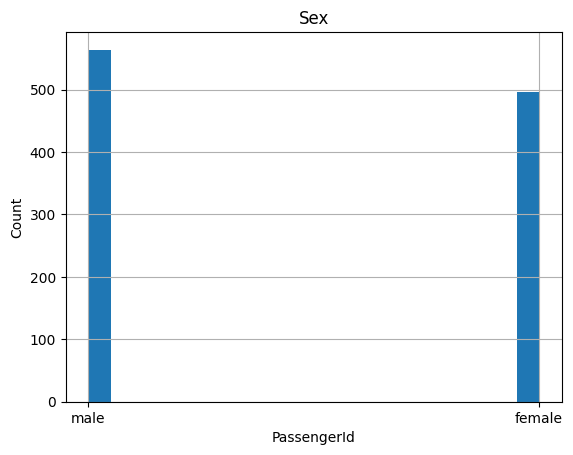

In [53]:
df['Sex'].hist(bins=20)
plt.title('Sex')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

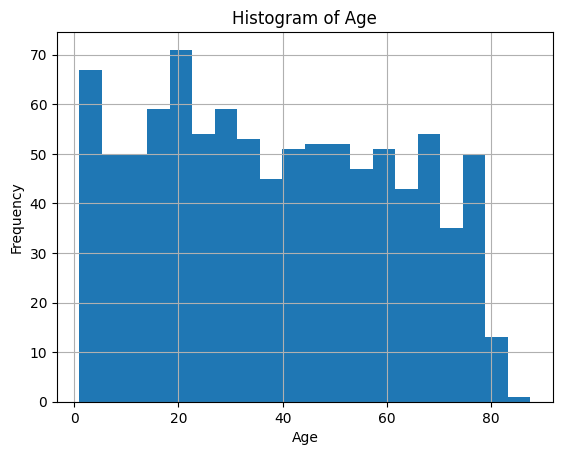

In [54]:
df['Age'].hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

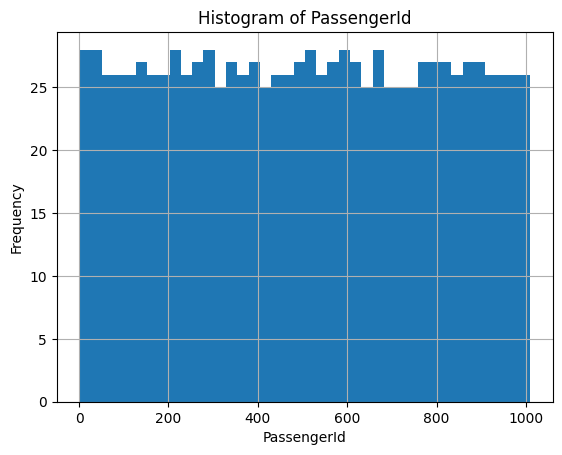

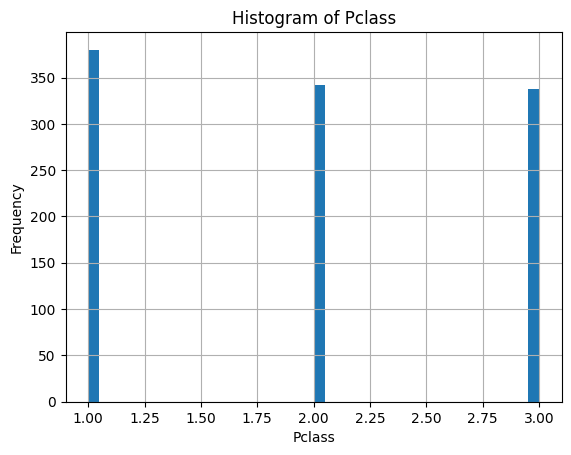

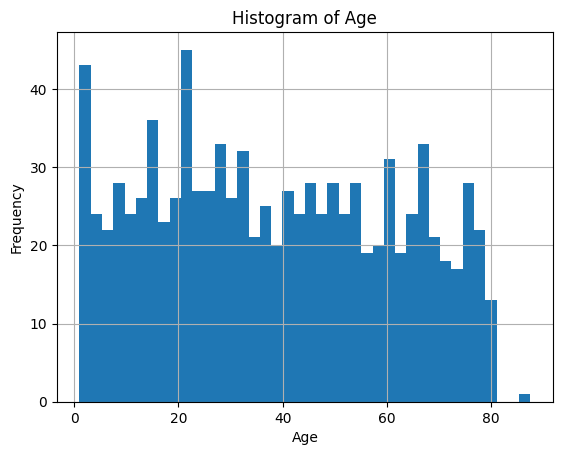

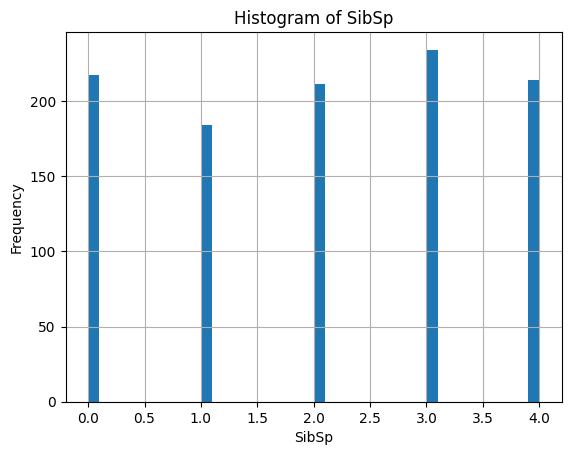

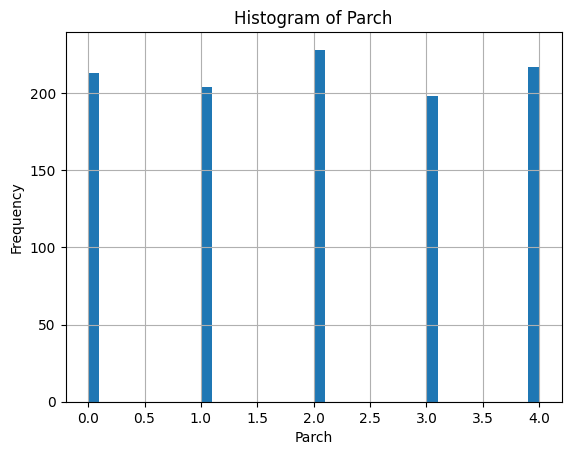

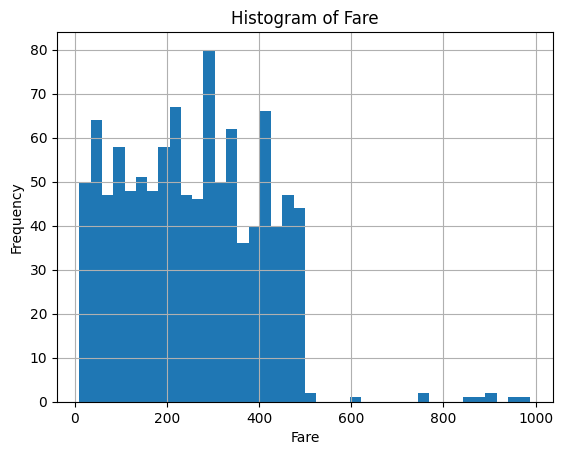

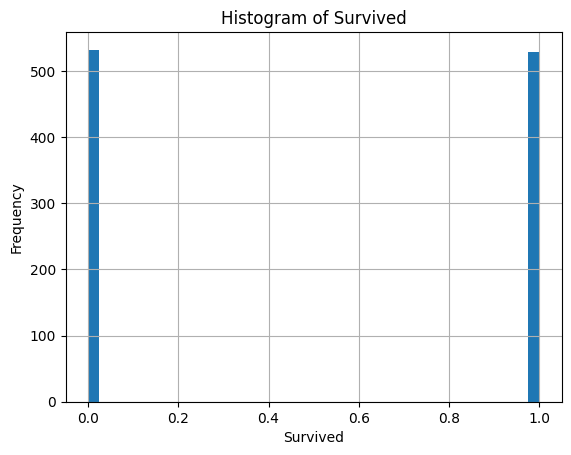

In [55]:
#Histograms: Visualizes the distribution of numerical data.
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Looping through each numeric column to display the value counts
for column in numeric_columns.columns:
    df[column].hist(bins=40)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    Age Age_Category
0  17.0     Teenager
1  60.0        Adult
2  64.0       Senior
3  35.0        Adult
4  70.0       Senior


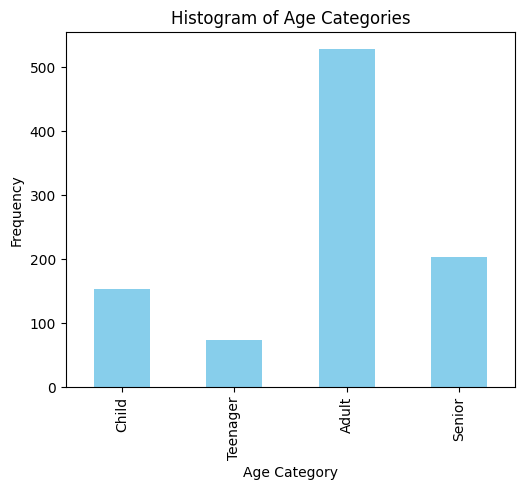

In [56]:
import pandas as pd

# Binning Age into categories
age_bins = [0, 12, 18, 60, 100]  # Defining bin edges
age_labels = ['Child', 'Teenager', 'Adult', 'Senior']  # Defining labels for the bins
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the updated dataframe with new columns
print(df[['Age', 'Age_Category']].head())

import matplotlib.pyplot as plt

# Plotting Age Category Histogram
plt.figure(figsize=(10, 5))

# Age Category histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
df['Age_Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Frequency')


# Show the plot
plt.tight_layout()
plt.show()


     Fare Fare_Category
0  144.08   Medium Fare
1  249.04     High Fare
2   50.31   Medium Fare
3  235.20     High Fare
4  160.17     High Fare


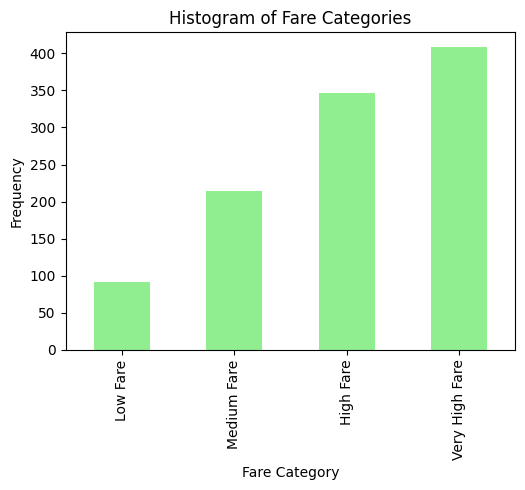

In [57]:
import pandas as pd

# Binning Fare into categories
fare_bins = [0, 50, 150, 300, df['Fare'].max()]  # Defining bin edges for Fare
fare_labels = ['Low Fare', 'Medium Fare', 'High Fare', 'Very High Fare']  # Defining labels for the bins
df['Fare_Category'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Display the updated dataframe with new columns
print(df[['Fare', 'Fare_Category']].head())

import matplotlib.pyplot as plt

# Plotting Age Category Histogram
plt.figure(figsize=(10, 5))

# Fare Category histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
df['Fare_Category'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Histogram of Fare Categories')
plt.xlabel('Fare Category')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


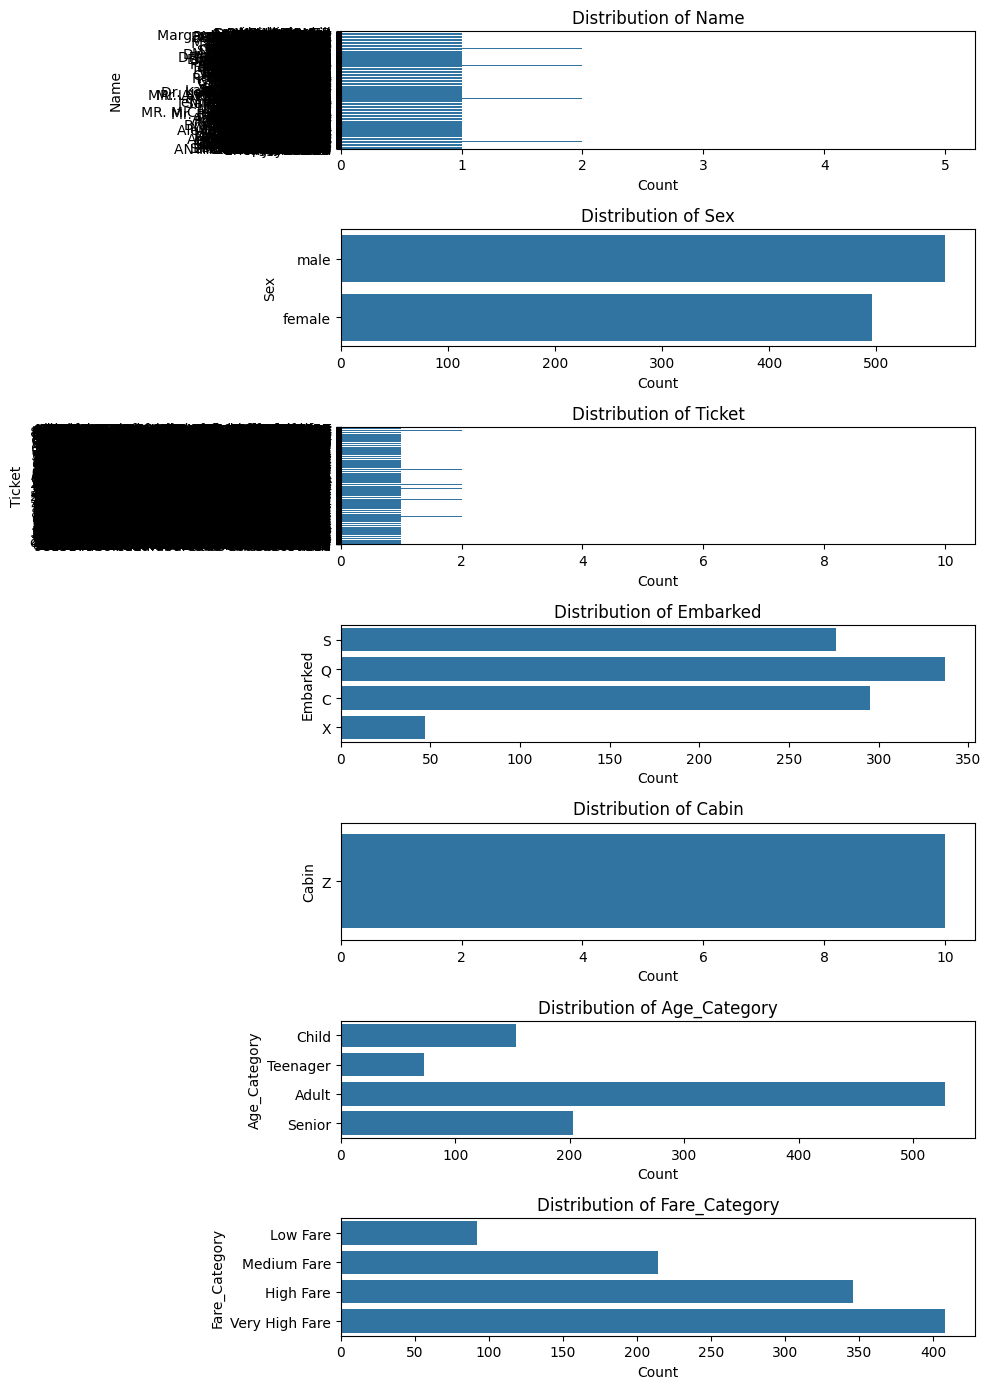

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns (including object and category types)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set up the size of the figure
plt.figure(figsize=(10, len(categorical_columns) * 2))  # Adjust height based on the number of categorical columns

# Loop through each categorical column and create a horizontal bar chart
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)  # Create subplots, one per categorical column
    sns.countplot(data=df, y=col)                # Generate horizontal bar chart by setting y=col
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')                          # X-axis label for counts
    plt.ylabel(col)                              # Y-axis label for the categorical variable

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

ModuleNotFoundError: No module named 'scipy'

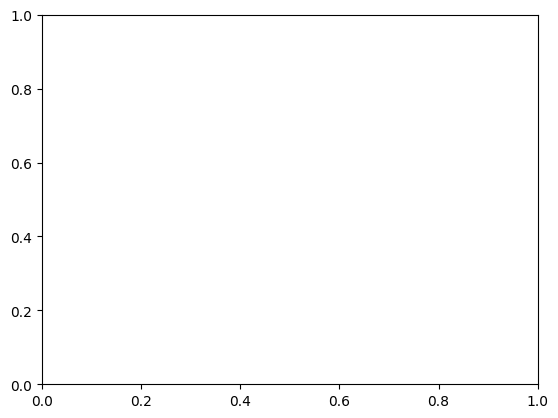

In [59]:
#Density Plots (KDE): Smoothed version of histograms for probability distributions.
import matplotlib.pyplot as plt

# Loop through all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate KDE for each numerical column
for column in numerical_columns:
    df[column].dropna().plot(kind='kde')  # dropna() to avoid errors due to missing values
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
#Box Plots: Shows the spread and potential outliers in data.
import matplotlib.pyplot as plt
import numpy as np

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of numeric columns
num_columns = len(numeric_columns)

# Dynamically determine the number of rows and columns for the subplots
nrows = int(np.ceil(num_columns / 3))
ncols = min(3, num_columns)

# Generate box plots for all numeric columns
df[numeric_columns].plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(12, 8), sharex=False, sharey=False)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

In [ ]:
#Scatter Plots: Visualizes relationships between two numerical variables.

import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate scatter plots for all pairs of numeric columns
for col1, col2 in itertools.combinations(numeric_columns, 2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


In [ ]:
#Scatter Plots: Visualizes relationships between two numerical variables.
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Age vs. Fare 
#Explore the relationship between the passenger's age and the fare paid.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Fare'])
plt.title('Scatter Plot: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
#Scatter Plots: Visualizes relationships between two numerical variables.

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Fare vs. Pclass 
# Investigate the relationship between the fare paid and the class of the passenger.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Pclass'], y=df['Fare'], hue=df['Pclass'])
plt.title('Scatter Plot: Fare vs. Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [ ]:
#Pair Plot: Shows relationships between multiple numerical variables.
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns from the Titanic dataset
subset_columns = ['Age', 'Fare', 'Pclass', 'Survived']

# Drop rows with missing values in the selected columns for cleaner plots
df_clean = df[subset_columns].dropna()

# Generate pair plot using Seaborn
sns.pairplot(df_clean, hue='Survived', palette='coolwarm')
plt.show()

In [ ]:
# Select relevant columns for pair plot
subset_columns_2 = ['SibSp', 'Parch', 'Fare', 'Age', 'Survived']

# Drop rows with missing values in the selected columns
df_clean_2 = df[subset_columns_2].dropna()

# Generate pair plot using Seaborn
sns.pairplot(df_clean_2, hue='Survived', palette='coolwarm')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Ensure all columns are numeric for correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric columns
correlation_matrix = df_numeric.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix (Including All Columns)')
plt.show()


In [ ]:
# For simplicity, we'll focus on numeric columns for the correlation matrix
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()